In [1]:
from konlpy.tag import Okt

In [2]:
okt = Okt()

In [3]:
data = "오늘 날씨가 추워서 기분이 좋지않다."

In [4]:
# 형태소 단위 분석
okt.morphs(data)

['오늘', '날씨', '가', '추워서', '기분', '이', '좋지', '않다', '.']

In [5]:
# 명사 추출
okt.nouns(data)

['오늘', '날씨', '기분']

In [6]:
# 어절 추출
okt.phrases(data)

['오늘', '오늘 날씨', '기분', '날씨']

In [7]:
# 형태소 분석 + 품사 태깅
okt.pos(data)

[('오늘', 'Noun'),
 ('날씨', 'Noun'),
 ('가', 'Josa'),
 ('추워서', 'Adjective'),
 ('기분', 'Noun'),
 ('이', 'Josa'),
 ('좋지', 'Adjective'),
 ('않다', 'Verb'),
 ('.', 'Punctuation')]

In [8]:
from collections import Counter
import pandas as pd
import numpy as np

#### 단어 빈도 계산

In [9]:
df = pd.read_csv("C:\\temf\\ratings.txt", delimiter="\t")
df.head()

,id,document,label
0,8112052,어릴때보고 지금다시봐도 재밌어요ㅋㅋ,1
1,8132799,"디자인을 배우는 학생으로, 외국디자이너와 그들이 일군 전통을 통해 발전해가는 문화산...",1
2,4655635,폴리스스토리 시리즈는 1부터 뉴까지 버릴께 하나도 없음.. 최고.,1
3,9251303,와.. 연기가 진짜 개쩔구나.. 지루할거라고 생각했는데 몰입해서 봤다.. 그래 이런...,1
4,10067386,안개 자욱한 밤하늘에 떠 있는 초승달 같은 영화.,1


In [10]:
x = df["document"][:1000]

In [11]:
n =[]

for i in x:
    n.append(i)

In [12]:
okt = Okt()
noun = okt.nouns(str(n))
count = Counter(noun)

In [13]:
noun_list = count.most_common(100)
for v in noun_list:
    print(v)

('영화', 326)
('정말', 89)
('최고', 79)
('연기', 62)
('진짜', 58)
('감동', 58)
('생각', 47)
('이', 47)
('그', 39)
('것', 37)
('때', 35)
('보고', 34)
('수', 34)
('드라마', 33)
('다시', 32)
('내', 32)
('점', 32)
('거', 31)
('사람', 30)
('지금', 27)
('더', 27)
('평점', 26)
('명작', 26)
('마음', 25)
('마지막', 25)
('사랑', 24)
('재미', 24)
('스토리', 24)
('하나', 23)
('말', 23)
('볼', 23)
('나', 22)
('작품', 22)
('완전', 21)
('현실', 21)
('왜', 20)
('배우', 20)
('듯', 19)
('느낌', 19)
('남자', 19)
('추천', 19)
('뭐', 18)
('매력', 17)
('굿', 16)
('중', 16)
('한번', 15)
('장면', 15)
('이야기', 15)
('난', 15)
('감독', 15)
('한국', 15)
('저', 14)
('꼭', 14)
('액션', 14)
('이영화', 14)
('편', 14)
('주인공', 13)
('좀', 13)
('역시', 12)
('속', 12)
('또', 12)
('정도', 12)
('대박', 12)
('연기력', 12)
('처음', 11)
('대한', 11)
('기대', 11)
('알', 11)
('인생', 11)
('모습', 11)
('개인', 11)
('가장', 11)
('이해', 10)
('인간', 10)
('최고다', 10)
('음악', 10)
('자신', 10)
('내용', 10)
('모든', 10)
('대해', 10)
('도', 9)
('제', 9)
('전', 9)
('만', 9)
('기억', 9)
('여운', 9)
('봄', 9)
('그냥', 9)
('가족', 9)
('요', 9)
('때문', 9)
('이건', 9)
('짱', 9)
('계속', 9)
('무

#### 단어리스트 만들기

In [14]:
word_list = df["document"][:3000]

In [15]:
tag = []

for s in word_list:
    morph = okt.pos(s)
    tag.append(morph)

In [16]:
# 명사 추출
noun_list = []
for s in tag:
    for word, tag in s:
        if tag in ["Noun"]:
            noun_list.append(word)

In [17]:
noun_list[:5]

['때', '보고', '지금', '다시', '디자인']

#### 두글자 이상 단어만 추출

In [18]:
noun_list = [n for n in noun_list if len(n) >1]
noun_list[:10]

['보고', '지금', '다시', '디자인', '학생', '외국', '디자이너', '일군', '전통', '통해']

#### 단어별 개수 세기

In [19]:
counts = Counter(noun_list)
tags = counts.most_common(1000)
tags[:10]

[('영화', 985),
 ('정말', 265),
 ('최고', 230),
 ('진짜', 184),
 ('감동', 155),
 ('연기', 142),
 ('생각', 140),
 ('드라마', 121),
 ('보고', 119),
 ('사람', 110)]

In [20]:
dic = dict(count.most_common(1000))

(-0.5, 595.5, 638.5, -0.5)

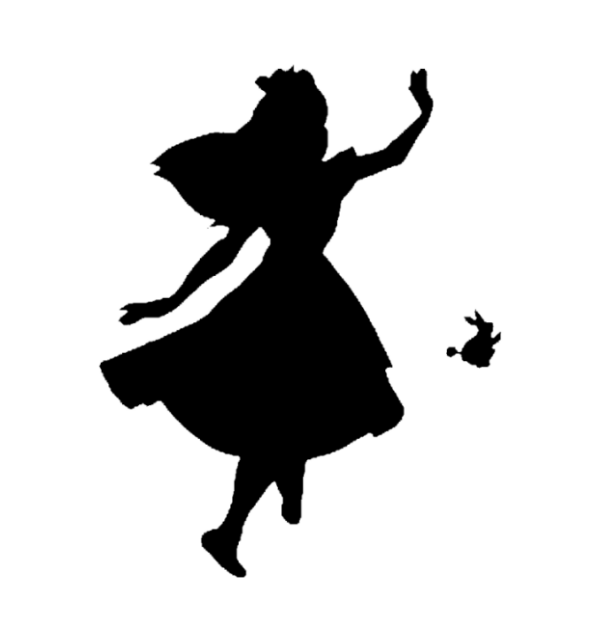

In [21]:
from PIL import Image
from wordcloud import WordCloud
import matplotlib.pyplot as plt

image_file = "alice.png"
img_file = Image.open(image_file)
alice_mask = np.array(img_file)

plt.figure(figsize =(8,8))
plt.imshow(alice_mask)
plt.axis("off")

(-0.5, 595.5, 638.5, -0.5)

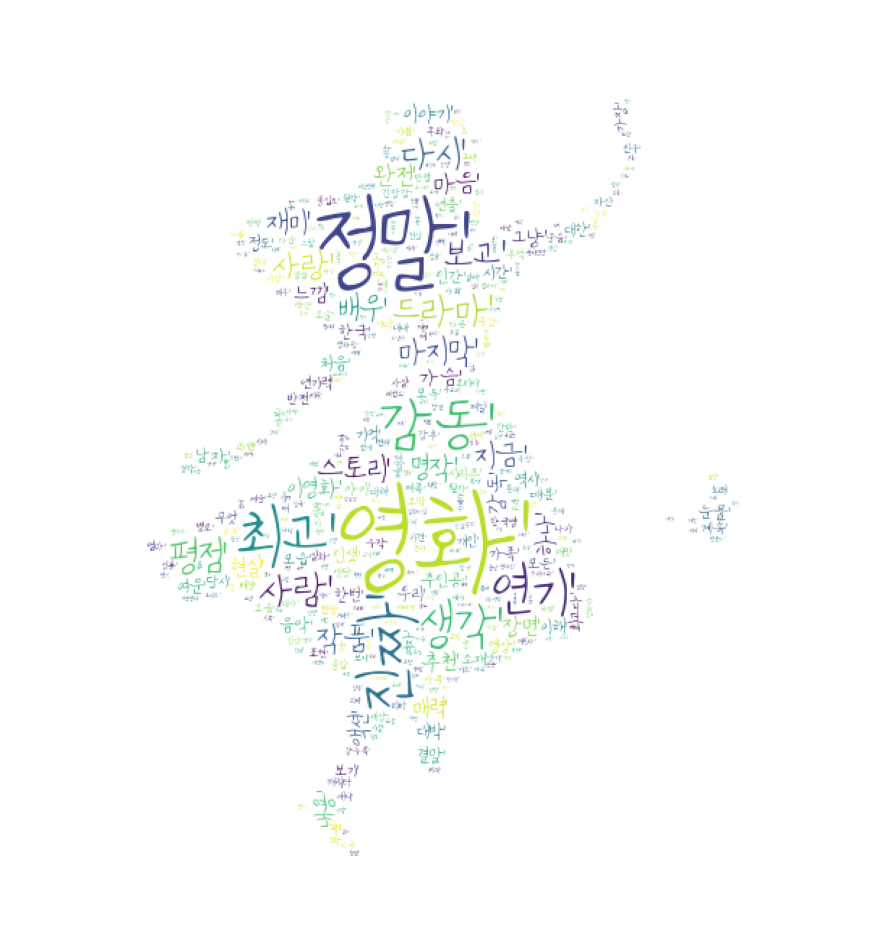

In [22]:
wordcloud = WordCloud(font_path="C:\\temf\\나눔손글씨 버드나무.ttf",
                      background_color="white",
                      max_words=1000,
                      mask=alice_mask)

wc = wordcloud.generate(str(tags))
plt.figure(figsize=(12,12))
plt.imshow(wc)
plt.axis("off")